<a href="https://colab.research.google.com/github/zaynabhassan/Random-Forest-Feature-Selection/blob/main/Household_Energy_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The first cell import python libraries.
1. numpy is a python library that is used for working with arrays and matrices. It is also used for performing mathematical operation like addition, subtraction, mult, mean and so on
2. pandas library is used for performing data analysis. it helps in loading, tabulating, merging, describing data and so much more. 

3. matplotlib and seaborn libray are used for data visualization in python. they are used for visualizing data as graphs and charts

These four libraries are essential in any data analysis problem and that is why we imported them

In [ ]:
data= pd.read_excel('exploratory_data.xlsx')

The above cell load the excel file 'exploratory_data' to this workspace. this is done with pandas library

In [ ]:
data.head()

,state,loc_gov,com_type,com_size,Hhold_cat,income_lev,gender,occupation,occup_income,educ,...,desired_price,govDo_more,fuel_cook,fuel_boilWater,cost_fuel,fuel_unav,cook_rainy,cook_harma,cook_rest,num_meals
0,Niger,LAPAI,village,1000,childless,low,1,Business_Person,1001_1500,university,...,6000,1,firewood,firewood,750,sometimes__4_12_times_in_twelve_months,mostly_inside,mostly_inside,occasionally_inside,three_meals
1,Niger,LAPAI,village,1000,nuclear,low,1,Farmer,1501_2000,secondary,...,5000,1,firewood,firewood,700,sometimes__4_12_times_in_twelve_months,mostly_inside,mostly_inside,occasionally_inside,three_meals
2,Niger,LAPAI,village,1000,nuclear,low,1,Business_Person,1501_2000,secondary,...,5000,1,firewood,firewood,1000,sometimes__4_12_times_in_twelve_months,mostly_inside,mostly_inside,occasionally_inside,three_meals
3,Niger,LAPAI,village,1000,extended,low,1,Farmer,1501_2000,informal,...,4000,1,firewood,firewood,500,sometimes__4_12_times_in_twelve_months,mostly_inside,mostly_inside,occasionally_inside,three_meals
4,Niger,LAPAI,village,1000,extended,low,1,Farmer,1001_1500,informal,...,4000,1,firewood,firewood,400,sometimes__4_12_times_in_twelve_months,mostly_inside,mostly_inside,occasionally_inside,three_meals


The code above shows how the loaded data is tabulated. It is important that we see the nature of our data. 
The code display the first 5 rows of our data

In [ ]:
data.shape

(433, 29)

It is also important that we know the shape of our data, the shape of data means the number of rows and columns present in the data. 
For this data, it shows that we have 433 rows of data and 29 columns


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             433 non-null    object
 1   loc_gov           433 non-null    object
 2   com_type          433 non-null    object
 3   com_size          433 non-null    int64 
 4   Hhold_cat         433 non-null    object
 5   income_lev        433 non-null    object
 6   gender            433 non-null    int64 
 7   occupation        433 non-null    object
 8   occup_income      433 non-null    object
 9   educ              433 non-null    object
 10  pres_stove        433 non-null    object
 11  pres_stove_label  433 non-null    object
 12  stove_timeUse     433 non-null    int64 
 13  stove_cookFood    433 non-null    object
 14  stove_boilWater   433 non-null    object
 15  num_cookStove     433 non-null    int64 
 16  know_clean        433 non-null    int64 
 17  know_cleanAdv   

Information about our data is also important so we used the above line of code to see some information about our data.

From the output, we have all the columns present in the data, we have 10 cols to be numerical data and 19 cols as categorical data. 

Also, we have all the columns as 433 non_null, this means that none of the column have missing value i.e no missed value, all data are complete

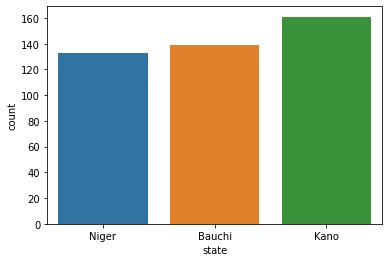

In [ ]:
sns.countplot(x= data['state'])

The cell above visualize the data distribution of 'state' column in the data. The above plot shows that kano has the highest data in the overall data followed by bauchi and niger.

In [ ]:
kano_df= data[data['state'] == 'Kano']
kano_df.head()


In [ ]:
kano_df['stove_timeUse'].unique

Since data is collected from different state, it is essential to see the nature of the data for exploration.

The first line of code in the above cell seperate data collected in kano from others and the second line show us what it looks like

In [ ]:
kano_df['loc_gov'].value_counts()

KIRU             66
TSANYAWA         49
GEZAWA           17
Gezawa           13
TSANYAWA LGA     11
LAPAI LGA         1
TSANYAWA  LGA     1
BICHI             1
Gezawa l.g.a      1
KUMBOTSO          1
Name: loc_gov, dtype: int64

The above line show us the number of data collected in each lga of kano state respectively.

It is said that data was collected from 3 local goverment area which are kiru, tsanyawa and gezawa but it revealed here that we have so much more. 

This is an error from data entry that is why lga written in upper case is different from that written in lower case

In [ ]:
kano_df['loc_gov'] = kano_df['loc_gov'].replace(['Gezawa'],'GEZAWA')
kano_df['loc_gov'] = kano_df['loc_gov'].replace(['Gezawa','TSANYAWA LGA','Gezawa l.g.a','TSANYAWA  LGA'],['GEZAWA','TSANYAWA','GEZAWA','TSANYAWA'])

To solve the problem from above, we deploy a method to combine lga's that are suppose to be together in the same class

In [ ]:
kano_df['loc_gov'].value_counts()

KIRU         66
TSANYAWA     61
GEZAWA       31
LAPAI LGA     1
BICHI         1
KUMBOTSO      1
Name: loc_gov, dtype: int64

We checked back and see that they are now classified except for the ones that does belong to kano state

In [ ]:
niger_df= data[data['state'] == 'Niger']
niger_df.head()

,state,loc_gov,com_type,com_size,Hhold_cat,income_lev,gender,occupation,occup_income,educ,...,desired_price,govDo_more,fuel_cook,fuel_boilWater,cost_fuel,fuel_unav,cook_rainy,cook_harma,cook_rest,num_meals
0,Niger,LAPAI,village,1000,childless,low,1,Business_Person,1001_1500,university,...,6000,1,firewood,firewood,750,sometimes__4_12_times_in_twelve_months,mostly_inside,mostly_inside,occasionally_inside,three_meals
1,Niger,LAPAI,village,1000,nuclear,low,1,Farmer,1501_2000,secondary,...,5000,1,firewood,firewood,700,sometimes__4_12_times_in_twelve_months,mostly_inside,mostly_inside,occasionally_inside,three_meals
2,Niger,LAPAI,village,1000,nuclear,low,1,Business_Person,1501_2000,secondary,...,5000,1,firewood,firewood,1000,sometimes__4_12_times_in_twelve_months,mostly_inside,mostly_inside,occasionally_inside,three_meals
3,Niger,LAPAI,village,1000,extended,low,1,Farmer,1501_2000,informal,...,4000,1,firewood,firewood,500,sometimes__4_12_times_in_twelve_months,mostly_inside,mostly_inside,occasionally_inside,three_meals
4,Niger,LAPAI,village,1000,extended,low,1,Farmer,1001_1500,informal,...,4000,1,firewood,firewood,400,sometimes__4_12_times_in_twelve_months,mostly_inside,mostly_inside,occasionally_inside,three_meals


Now to data collected from niger state

In [ ]:
niger_df['loc_gov'].value_counts()

LAPAI        69
GURARA       33
WUSHISHI     30
WUSHISHSI     1
Name: loc_gov, dtype: int64

It also have the same problem as the kano data

In [ ]:
niger_df['loc_gov'] = niger_df['loc_gov'].replace(['WUSHISHSI'],'WUSHISHI')

In [ ]:
niger_df['loc_gov'].value_counts()

LAPAI       69
GURARA      33
WUSHISHI    31
Name: loc_gov, dtype: int64

We deploy the same method from earlier to classify the lga in their respective correct class

In [ ]:
bauchi_df= data[data['state'] == 'Bauchi']
bauchi_df.head()

,state,loc_gov,com_type,com_size,Hhold_cat,income_lev,gender,occupation,occup_income,educ,...,desired_price,govDo_more,fuel_cook,fuel_boilWater,cost_fuel,fuel_unav,cook_rainy,cook_harma,cook_rest,num_meals
112,Bauchi,GAMAWA,urban,5000,nuclear,low,1,Business_Person,1001_1500,secondary,...,350,1,firewood,firewood,1400,sometimes__4_12_times_in_twelve_months,always_inside,always_inside,occasionally_inside,three_meals
113,Bauchi,DASS,rural,650,nuclear,low,1,Farmer,more,primary,...,10000,1,firewood,firewood,1800,never__always_available,always_inside,occasionally_inside,always_inside,two_meals
114,Bauchi,DASS,rural,650,extended,medium,1,Trader,1501_2000,trade_college,...,10000,1,firewood,firewood,2000,never__always_available,always_inside,occasionally_inside,always_inside,two_meals
115,Bauchi,DASS,rural,650,extended,medium,1,Business_Person,more,secondary,...,10000,1,firewood,firewood,2000,never__always_available,always_inside,occasionally_inside,always_inside,two_meals
116,Bauchi,DASS,rural,650,nuclear,low,1,Trader,1501_2000,informal,...,3500,1,firewood,firewood,1800,never__always_available,always_inside,occasionally_inside,always_inside,two_meals


In [ ]:
bauchi_df['loc_gov'].value_counts()

DASS       51
GAMAWA     31
Darazo     28
DARAZO     16
Gamawa      9
BAUCHI      1
DARAZO      1
Bauchi      1
Ganjuwa     1
Name: loc_gov, dtype: int64

In [ ]:
bauchi_df['loc_gov'] = bauchi_df['loc_gov'].replace(['Darazo','Gamawa','BAUCHI','Bauchi','DARAZO'],['DARRAZO','GAMAWA','GAMAWA','DARRAZO','DARRAZO'])

Same to data collected from bauchi, it has similar problem which give the need to reclassify them to a single class

In [ ]:
bauchi_df['loc_gov'].value_counts()

DASS       51
DARRAZO    45
GAMAWA     41
DARAZO      1
Ganjuwa     1
Name: loc_gov, dtype: int64

After cleaning the data by state and lga, we need to add all the data back together in one table. 

The cell below concatenate the data back together and these are data from kano, niger and bauchi and stored in a new variable

In [ ]:
#concatenating clean data
new_data= pd.concat([bauchi_df, kano_df, niger_df], axis= 0, ignore_index= True)

new_data['loc_gov'] = new_data['loc_gov'].replace(['LAPAI LGA'] ,'LAPAI')
new_data.head()

,state,loc_gov,com_type,com_size,Hhold_cat,income_lev,gender,occupation,occup_income,educ,...,desired_price,govDo_more,fuel_cook,fuel_boilWater,cost_fuel,fuel_unav,cook_rainy,cook_harma,cook_rest,num_meals
0,Bauchi,GAMAWA,urban,5000,nuclear,low,1,Business_Person,1001_1500,secondary,...,350,1,firewood,firewood,1400,sometimes__4_12_times_in_twelve_months,always_inside,always_inside,occasionally_inside,three_meals
1,Bauchi,DASS,rural,650,nuclear,low,1,Farmer,more,primary,...,10000,1,firewood,firewood,1800,never__always_available,always_inside,occasionally_inside,always_inside,two_meals
2,Bauchi,DASS,rural,650,extended,medium,1,Trader,1501_2000,trade_college,...,10000,1,firewood,firewood,2000,never__always_available,always_inside,occasionally_inside,always_inside,two_meals
3,Bauchi,DASS,rural,650,extended,medium,1,Business_Person,more,secondary,...,10000,1,firewood,firewood,2000,never__always_available,always_inside,occasionally_inside,always_inside,two_meals
4,Bauchi,DASS,rural,650,nuclear,low,1,Trader,1501_2000,informal,...,3500,1,firewood,firewood,1800,never__always_available,always_inside,occasionally_inside,always_inside,two_meals


We also noticed from ealier that some data are suppose to be in different state to where they are placed, this give the reason for us to put them back in order.


Ganjuwa, kumbotso are left out, we do not know where they belong and for this reason, we need to remove them from our data.

We use the below lines of code to get their location in the overall data and remove them, then we check the shape of the data again

In [ ]:
# Get indexes where the col loc_gov does not have the following
index1 = new_data[(new_data['loc_gov'] == 'Ganjuwa')].index 
index2 = new_data[(new_data['loc_gov'] == 'KUMBOTSO')].index 
index3 = new_data[(new_data['loc_gov'] == 'BICHI')].index 
index4 = new_data[(new_data['loc_gov'] == 'DARAZO')].index 

# Delete these row indexes from dataFrame
new_data.drop(index1, inplace=True)
new_data.drop(index2, inplace=True)
new_data.drop(index3, inplace=True)
new_data.drop(index4, inplace=True)

new_data.shape

(430, 29)

In [ ]:
new_data['cook_rainy'] = new_data['cook_rainy'].replace(['always_inside occasionally_inside','mostly_inside always_inside','occasionally_inside always_inside','always_inside mostly_inside'],['always_inside','mostly_inside','occasionally_inside','mostly_inside'])

new_data['occup_income'] = new_data['occup_income'].replace(['1001_1501','1501_2001','1501_2002'],['1001_1500','1501_2000','1501_2000'])

new_data['cook_rest'] = new_data['cook_rest'].replace(['mostly_inside occasionally_inside','always_inside mostly_inside','always_inside occasionally_inside'],['mostly_inside','always_inside','occasionally_inside'])



In [ ]:
new_data['loc_gov'].value_counts()

LAPAI       70
KIRU        66
TSANYAWA    61
DASS        51
DARRAZO     45
GAMAWA      41
GURARA      33
GEZAWA      31
WUSHISHI    31
DARAZO       1
Name: loc_gov, dtype: int64

In [ ]:
new_data.shape

(430, 29)

The shape of the data return from 433 to 430, this means 3 samples have been removed

We used the below cell to drop the lga that does not belong to kano. We did this because of the need to visualize the number of meals served in kano state by lga

In [ ]:
kano_1 = kano_df[(kano_df['loc_gov'] == 'LAPAI LGA')].index 
kano_2 = kano_df[(kano_df['loc_gov'] == 'BICHI')].index 
kano_3 = kano_df[(kano_df['loc_gov'] == 'KUMBOTSO')].index  

kano_df.drop(kano_1, inplace=True)
kano_df.drop(kano_2, inplace=True)
kano_df.drop(kano_3, inplace=True)

The cell below visualize the number of meals served in each lga of kano state

<Figure size 360x360 with 0 Axes>

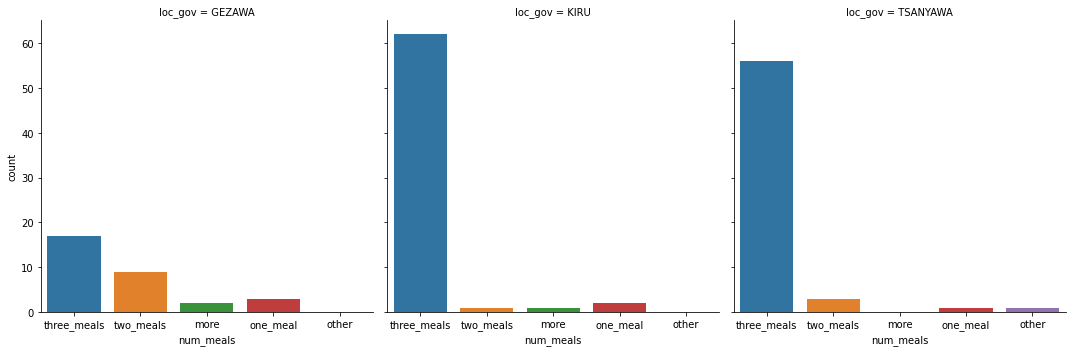

In [ ]:
fig= plt.figure(figsize=(5,5))
sns.catplot(x= 'num_meals', data= kano_df, kind='count', col='loc_gov')


Now we move to visualizing how many 0s and 1s we have in our target variable

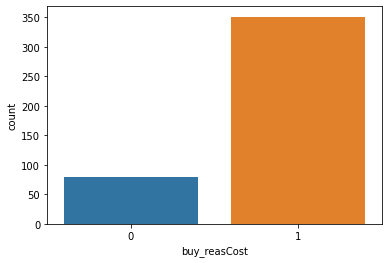

In [ ]:
sns.countplot(x= new_data['buy_reasCost'])
plt.show()

#Encoding Categorical variable

The below cell select all the categorical variable present in the data, it then get the names of the columns and convert them to numeral.

The last line of the code then concat the encoded data and already numeric data in the dataset

In [ ]:
new_data['buy_reasCost'].value_counts()

1    351
0     79
Name: buy_reasCost, dtype: int64

In [ ]:
#Encoding Categorical data
new_df= new_data.select_dtypes(include='object')
variables= new_df.columns

for i in variables:
    new_df[i]= new_df[i].astype('category')
    new_df[i]= new_df[i].cat.codes

new_dff= pd.concat([new_df, new_data.select_dtypes(exclude='object')], axis= 1) 


The below cell shows first five rows of the encoded data

In [ ]:
new_dff.head()

,state,loc_gov,com_type,Hhold_cat,income_lev,occupation,occup_income,educ,pres_stove,pres_stove_label,...,com_size,gender,stove_timeUse,num_cookStove,know_clean,know_cleanAdv,buy_reasCost,desired_price,govDo_more,cost_fuel
0,0,3,2,2,1,0,1,2,7,0,...,5000,1,60,1,0,0,1,350,1,1400
1,0,2,1,2,1,1,4,1,7,0,...,650,1,421,1,1,0,0,10000,1,1800
2,0,2,1,1,2,4,2,3,7,0,...,650,1,698,1,1,0,0,10000,1,2000
3,0,2,1,1,2,0,4,2,7,0,...,650,1,180,1,1,0,0,10000,1,2000
4,0,2,1,2,1,4,2,0,7,0,...,650,1,439,1,1,0,0,3500,1,1800


#Seperating Target variable y and features x

The below cell seperated the target variable 'buy_reasCost' from the features`

In [ ]:
#seperating target variable y from x features
x= new_dff.drop('buy_reasCost', axis= 1)
y= new_dff['buy_reasCost']

#Feature selection
feature selection is the selection of important features to the model. The cell below select features using inbuilt function of random forest classifier. Below is a plot that shows the variation in the importance of the features

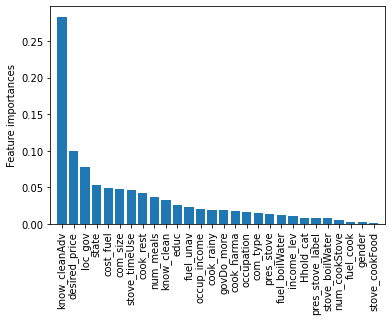

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators= 100, random_state= 42)

forest.fit(x , y)

importances= forest.feature_importances_
indices= np.argsort(importances)[::-1]
plt.ylabel('Feature importances')
plt.bar(range(x.shape[1]), importances[indices], align='center')
ft_labels= x.columns[:]

plt.xticks(range(x.shape[1]), ft_labels[indices], rotation=90)
plt.xlim([-1, x.shape[1]])

plt.savefig('feature_impotance.png')

In [ ]:
for i in enumerate(importances[indices]):
	print('Feature: %0d, Score: %.5f' % (i))


Feature: 0, Score: 0.28327
Feature: 1, Score: 0.09961
Feature: 2, Score: 0.07848
Feature: 3, Score: 0.05307
Feature: 4, Score: 0.04952
Feature: 5, Score: 0.04762
Feature: 6, Score: 0.04634
Feature: 7, Score: 0.04244
Feature: 8, Score: 0.03633
Feature: 9, Score: 0.03215
Feature: 10, Score: 0.02613
Feature: 11, Score: 0.02345
Feature: 12, Score: 0.02108
Feature: 13, Score: 0.01892
Feature: 14, Score: 0.01879
Feature: 15, Score: 0.01767
Feature: 16, Score: 0.01586
Feature: 17, Score: 0.01481
Feature: 18, Score: 0.01330
Feature: 19, Score: 0.01219
Feature: 20, Score: 0.01091
Feature: 21, Score: 0.00838
Feature: 22, Score: 0.00823
Feature: 23, Score: 0.00792
Feature: 24, Score: 0.00597
Feature: 25, Score: 0.00324
Feature: 26, Score: 0.00318
Feature: 27, Score: 0.00116


After geting the features importance for all the features present in our data, we collect these features by setting a threshold. In this case, we've set a threshold of median.  

This means that the median of all the result we have from feature importance will be calculated and features with equal of higher i.e >= median will be chosen and the rest features will be discarded

In [ ]:
#features selection
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(forest, threshold= 'median')
sel.fit(x, y)

selected_feat= x.columns[(sel.get_support())]

print('Length of selected features :', len(selected_feat))
print('selected features are:', selected_feat)


Length of selected features : 14
selected features are: Index(['state', 'loc_gov', 'occup_income', 'educ', 'fuel_unav', 'cook_rainy',
       'cook_rest', 'num_meals', 'com_size', 'stove_timeUse', 'know_clean',
       'know_cleanAdv', 'desired_price', 'cost_fuel'],
      dtype='object')


The above cell selected features and these features will be used to train the model

In [ ]:
X= x[['state', 'loc_gov', 'occup_income', 'educ', 'fuel_unav', 'cook_rainy',
       'cook_rest', 'num_meals', 'com_size', 'stove_timeUse', 'know_clean',
       'know_cleanAdv', 'desired_price', 'cost_fuel']]

In [ ]:
X.head()

,state,loc_gov,occup_income,educ,fuel_unav,cook_rainy,cook_rest,num_meals,com_size,stove_timeUse,know_clean,know_cleanAdv,desired_price,cost_fuel
0,0,3,1,2,4,0,2,3,5000,60,0,0,350,1400
1,0,2,4,1,1,0,0,4,650,421,1,0,10000,1800
2,0,2,2,3,1,0,0,4,650,698,1,0,10000,2000
3,0,2,4,2,1,0,0,4,650,180,1,0,10000,2000
4,0,2,2,0,1,0,0,4,650,439,1,0,3500,1800


The above make a new dataframe from the selected features and these data is splitted into training and test set

In [ ]:
X.shape

(430, 14)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size= .25, random_state= 100)

We splitted the features and label into train and test set with at the ratio of 0.75, 0.25.

75% of the data belong to the train set and 25% belong to the test set, this means 75% of the data will be used to train the model and 25% will be used to test the model performance

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(322, 14) (322,)
(108, 14) (108,)


In [ ]:
Y_test.value_counts()

1    88
0    20
Name: buy_reasCost, dtype: int64

After splitting the data, 332 samples of the data falls in the training set while 108 falls on the test set

In building a model, there is always need to scale our data. This help us bring our data under the same scale.  

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

Standardization equation= x - mean(x)/ standard deviation(x)

where

x= feature x

mean(x)= mean of x

standard deviation of x

This formula computes standardization for the fitted data, and result in 0 mean and unit variance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_1= DecisionTreeClassifier()

model_1.fit(X_train, Y_train)
pred1= model_1.predict(X_test)


In [ ]:
#calculating rsquared

def rsquared(y, y_pred):

    ss_res = np.sum(np.power(y - y_pred, 2))
    ss_tot = np.sum(np.power((y - (np.mean(y))), 2))
    return (ss_tot- ss_res)/ss_tot

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, r2_score
print('Accuracy: ', accuracy_score(Y_test, pred1))

print('R_squared : ', rsquared(Y_test, pred1))


Accuracy:  0.9074074074074074
R_squared :  0.3863636363636364


The first algorithm we employ is the decisiontreeclassifier algorithm, this model give and accuarcy of 92% and a rsquared of 45%.

Below is the report on the classification

In [ ]:
print(classification_report(Y_test, pred1))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        20
           1       0.92      0.97      0.94        88

    accuracy                           0.91       108
   macro avg       0.87      0.81      0.83       108
weighted avg       0.90      0.91      0.90       108



To optimize the perfomance of the model, the tweak the parameters, this process is called hyperparameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

model1_grid = GridSearchCV(estimator=DecisionTreeClassifier(), 
                           param_grid=params, 
                           cv= 4, n_jobs=-1, scoring = "accuracy")

model1_grid.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
grid_pred1= model1_grid.predict(X_test)

print('Accuracy: ', accuracy_score(Y_test, grid_pred1))

print('R_squared : ', rsquared(Y_test, grid_pred1))

Accuracy:  0.9444444444444444
R_squared :  0.6318181818181818


In [ ]:
print(classification_report(Y_test, grid_pred1))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.98      0.95      0.97        88

    accuracy                           0.94       108
   macro avg       0.90      0.93      0.91       108
weighted avg       0.95      0.94      0.95       108



After tunning the model parameters, we got a  better result 

We explore another classification algorithm to see if we have a better result. Then we explore RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2= RandomForestClassifier()

model_2.fit(X_train, Y_train)
pred2= model_2.predict(X_test)

In [ ]:
print('Accuracy: ', accuracy_score(Y_test, pred2))

print('R_squared : ', rsquared(Y_test, pred2))

Accuracy:  0.9537037037037037
R_squared :  0.6931818181818182


In [ ]:
print(classification_report(Y_test, pred2))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.97      0.98      0.97        88

    accuracy                           0.95       108
   macro avg       0.93      0.91      0.92       108
weighted avg       0.95      0.95      0.95       108



We got an accuracy of 94% and rsquared of 63%. 

Lets tune it parameters too to see if we can achieve a better result

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6]
}
model2_grid = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

model2_grid.fit(X_train, Y_train)
model2_grid_pred= model2_grid.predict(X_test)

In [ ]:
print('Accuracy: ', accuracy_score(Y_test, model2_grid_pred))

print('R_squared : ', rsquared(Y_test, model2_grid_pred))

Accuracy:  0.9074074074074074
R_squared :  0.3863636363636364


An accuracy of 93% and 51% of rsquared was achieved



In [ ]:
print(classification_report(Y_test, model2_grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        20
           1       0.91      0.98      0.95        88

    accuracy                           0.91       108
   macro avg       0.89      0.79      0.83       108
weighted avg       0.90      0.91      0.90       108



We explore another algorithm called support vector machine

In [ ]:
from sklearn.svm import SVC
model_3= SVC()

model_3.fit(X_train, Y_train)
pred3= model_3.predict(X_test)

In [ ]:
print('Accuracy: ', accuracy_score(Y_test, pred3))

print('R_squared : ', rsquared(Y_test, pred3))

Accuracy:  0.9629629629629629
R_squared :  0.7545454545454545


In [ ]:
pred3

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [ ]:
print(classification_report(Y_test, pred3))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.98      0.98      0.98        88

    accuracy                           0.96       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.96      0.96      0.96       108



We got an accuracy of 96% and rsquared of 75%

In [ ]:
k=model_3.coef_
#k.transpose()

i=model_3.intercept_

y= i+ np.dot(X_test[103], k.transpose())

b= i+ np.dot(X_test[103], k.transpose())*y
print(y,b)

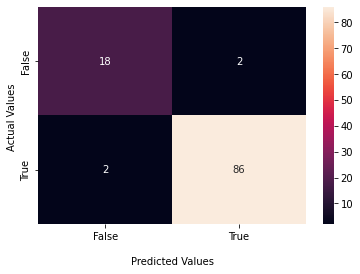

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test, pred3)

ax = sns.heatmap(cf_matrix, annot=True)

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

plt.savefig('svm.png')

Formula for hyperlane

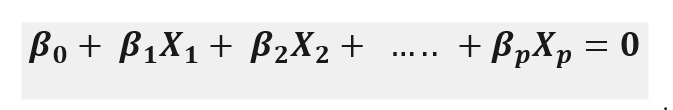

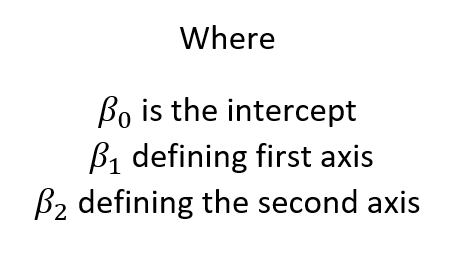

SVM tries to find the best hperlane for classification. if the equation of hyperlane is < 0 that means the classification is in one class and > 0 for the other class

In [ ]:
print(model_3.intercept_)

[0.63093438]


Tunning svm parameters

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf','linear']}

grid3 = GridSearchCV(SVC(), param_grid, cv=3, n_jobs=-1)

grid3.fit(X_train, Y_train)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [ ]:
print(grid3.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
grid3_pred = grid3.predict(X_test)

In [ ]:
print(classification_report(Y_test, grid3_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.98      0.95      0.97        88

    accuracy                           0.94       108
   macro avg       0.90      0.93      0.91       108
weighted avg       0.95      0.94      0.95       108



In [ ]:
print('R_squared : ', rsquared(Y_test, grid3_pred))

R_squared :  0.6318181818181818


Tweaking this model result in reduce in accuracy and rsquared

So far, we can say see that SVC with it defualt parameters works better with our data. 

#Saving model with the optimal result

In [ ]:
#Saving model

import pickle
Filename = 'finalized_model.pickle'
pickle.dump(model_3, open(Filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(Filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

#Regression model

In [ ]:
#seperating target variable y from x features for regression model
x_reg= new_dff.drop('desired_price', axis= 1)
y_reg= new_dff['desired_price']

In [ ]:
x_reg.head()

,state,loc_gov,com_type,Hhold_cat,income_lev,occupation,occup_income,educ,pres_stove,pres_stove_label,...,num_meals,com_size,gender,stove_timeUse,num_cookStove,know_clean,know_cleanAdv,buy_reasCost,govDo_more,cost_fuel
0,0,3,2,2,1,0,1,2,7,0,...,3,5000,1,60,1,0,0,1,1,1400
1,0,2,1,2,1,1,4,1,7,0,...,4,650,1,421,1,1,0,0,1,1800
2,0,2,1,1,2,4,2,3,7,0,...,4,650,1,698,1,1,0,0,1,2000
3,0,2,1,1,2,0,4,2,7,0,...,4,650,1,180,1,1,0,0,1,2000
4,0,2,1,2,1,4,2,0,7,0,...,4,650,1,439,1,1,0,0,1,1800


In [ ]:
y_reg

0        350
1      10000
2      10000
3      10000
4       3500
       ...  
428     5000
429     6000
430     1000
431     3500
432     5000
Name: desired_price, Length: 430, dtype: int64

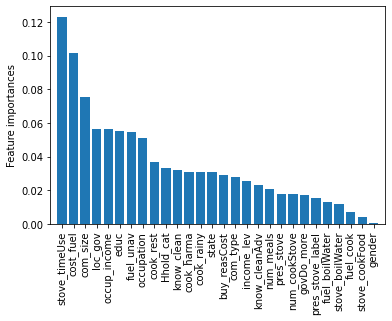

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators= 100, random_state= 42)

forest.fit(x_reg , y_reg)

importance= forest.feature_importances_
indi= np.argsort(importances)[::-1]
plt.ylabel('Feature importances')
plt.bar(range(x.shape[1]), importances[indi], align='center')
ft_labels= x_reg.columns[:]

plt.xticks(range(x_reg.shape[1]), ft_labels[indi], rotation=90)
plt.xlim([-1, x_reg.shape[1]])

plt.savefig('feature_impotance_reg.png')

In [ ]:
for i in enumerate(importance[indi]):
	print('Feature: %0d, Score: %.5f' % (i))

Feature: 0, Score: 0.12303
Feature: 1, Score: 0.10179
Feature: 2, Score: 0.07519
Feature: 3, Score: 0.05636
Feature: 4, Score: 0.05635
Feature: 5, Score: 0.05529
Feature: 6, Score: 0.05477
Feature: 7, Score: 0.05106
Feature: 8, Score: 0.03656
Feature: 9, Score: 0.03309
Feature: 10, Score: 0.03177
Feature: 11, Score: 0.03100
Feature: 12, Score: 0.03086
Feature: 13, Score: 0.03064
Feature: 14, Score: 0.02936
Feature: 15, Score: 0.02806
Feature: 16, Score: 0.02546
Feature: 17, Score: 0.02293
Feature: 18, Score: 0.02088
Feature: 19, Score: 0.01800
Feature: 20, Score: 0.01784
Feature: 21, Score: 0.01725
Feature: 22, Score: 0.01548
Feature: 23, Score: 0.01323
Feature: 24, Score: 0.01208
Feature: 25, Score: 0.00691
Feature: 26, Score: 0.00405
Feature: 27, Score: 0.00071


In [ ]:
#features selection
from sklearn.feature_selection import SelectFromModel

slt = SelectFromModel(forest, threshold= 'median')
slt.fit(x_reg, y_reg)

selec_feat= x_reg.columns[(slt.get_support())]

print('Length of selected features :', len(selec_feat))
print('selected features are:', selec_feat)

Length of selected features : 14
selected features are: Index(['state', 'loc_gov', 'Hhold_cat', 'occupation', 'occup_income', 'educ',
       'fuel_unav', 'cook_rainy', 'cook_harma', 'cook_rest', 'com_size',
       'stove_timeUse', 'know_clean', 'cost_fuel'],
      dtype='object')


In [ ]:
X_reg= new_dff[['state', 'loc_gov', 'Hhold_cat', 'occupation', 'occup_income', 'educ',
       'fuel_unav', 'cook_rainy', 'cook_harma', 'cook_rest', 'com_size',
       'stove_timeUse', 'know_clean', 'cost_fuel','desired_price']]

In [ ]:
X_reg.head()

,state,loc_gov,Hhold_cat,occupation,occup_income,educ,fuel_unav,cook_rainy,cook_harma,cook_rest,com_size,stove_timeUse,know_clean,cost_fuel,desired_price
0,0,3,2,0,1,2,4,0,0,2,5000,60,0,1400,350
1,0,2,2,1,4,1,1,0,4,0,650,421,1,1800,10000
2,0,2,1,4,2,3,1,0,4,0,650,698,1,2000,10000
3,0,2,1,0,4,2,1,0,4,0,650,180,1,2000,10000
4,0,2,2,4,2,0,1,0,4,0,650,439,1,1800,3500


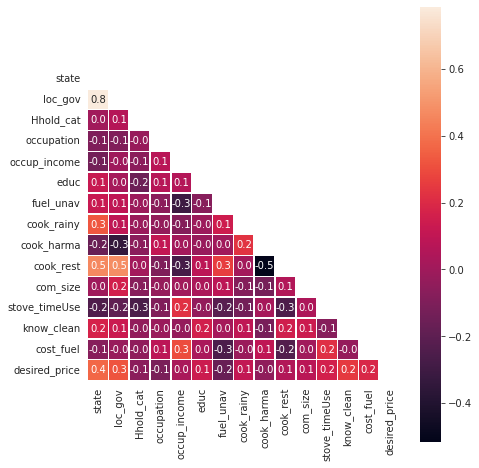

In [ ]:
#plotting the correlation between variable

mask= np.zeros_like(X_reg.corr())

mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(7, 8))
    ax = sns.heatmap(X_reg.corr(), annot= True,annot_kws= {'size':10},
                 mask=mask, square=True,linewidths= .5, fmt= '.1f')#,vmin=-0.08, vmax=0.24)

In [ ]:
y_reg

In [ ]:
t= X_reg[['state','loc_gov','desired_price']]

t_x= t.drop('desired_price', axis= 1)
t_y= t['desired_price']

In [ ]:
t_y

In [ ]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, Yr_train, Yr_test= train_test_split(t_x, t_y, test_size= .25, random_state= 100)

In [ ]:
Xr_train.head()

,state,loc_gov
118,0,2
150,1,6
158,1,6
400,2,9
218,1,6


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
Xr_train= scaler.fit_transform(Xr_train)
Xr_test= scaler.transform(Xr_test)

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(.85)
pca.fit(Xr_train)

PCA(n_components=0.85)

In [ ]:
pca.n_components_

7

In [ ]:
pca.transform(Xr_train)
pca.transform(Xr_test)

array([[ 3.83452652e-01, -1.49634189e+00,  8.72868589e-02,
        -3.62438099e-01,  4.72988210e-01, -2.96344742e-01,
         1.08307733e+00],
       [ 2.23598471e-01, -2.13136385e+00, -1.41791744e+00,
         1.94898692e+00,  1.15313588e+00, -9.00351461e-01,
        -8.30963574e-01],
       [-2.16375546e+00, -3.45702915e-01,  2.86155785e-01,
         6.42847192e-01, -7.88055531e-01, -2.75826504e-01,
        -3.55639648e-01],
       [ 4.85559447e-02, -1.91480444e+00, -1.19064420e+00,
         2.37151194e+00,  4.66313482e-01,  4.83290132e-01,
        -6.71610143e-02],
       [-2.27393792e+00,  2.08371517e+00,  2.68781793e+00,
         1.69781037e+00,  2.65451764e+00,  4.76387855e-01,
         8.87693517e-01],
       [ 1.43048097e+00, -1.04276904e+00, -4.85735113e-02,
         4.62496018e-01, -3.56314353e-02,  9.16134843e-01,
         1.28297991e+00],
       [ 6.61950573e-01,  2.16852930e+00, -2.06086107e+00,
        -1.14254461e-01,  4.71088103e-01,  7.96356897e-01,
        -2.7573816

In [ ]:
from sklearn.metrics import f1_score, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from sklearn.linear_model import LinearRegression
reg2= LinearRegression()

reg2.fit(Xr_train, Yr_train)
reg2.predict(Xr_test)

array([2132.73438161, 1916.90286206, 4308.08015063, 2132.73438161,
       3544.15454545, 3112.49150634, 4523.91167018, 3544.15454545,
       1916.90286206, 3328.3230259 , 3328.3230259 , 3112.49150634,
       3544.15454545, 1916.90286206, 3328.3230259 , 3544.15454545,
       1916.90286206, 3112.49150634, 3328.3230259 , 4308.08015063,
       4092.24863107, 4092.24863107, 3328.3230259 , 3112.49150634,
       1916.90286206, 4523.91167018, 4092.24863107, 1916.90286206,
       2132.73438161, 2132.73438161, 4523.91167018, 1916.90286206,
       1808.98710228, 1916.90286206, 3544.15454545, 3328.3230259 ,
       3328.3230259 , 3544.15454545, 3112.49150634, 3544.15454545,
       4308.08015063, 4308.08015063, 1916.90286206, 2024.81862184,
       4308.08015063, 3328.3230259 , 4308.08015063, 1916.90286206,
       4308.08015063, 4308.08015063, 2024.81862184, 4308.08015063,
       2132.73438161, 4308.08015063, 3112.49150634, 3328.3230259 ,
       1916.90286206, 3328.3230259 , 3544.15454545, 2132.73438

In [ ]:
reg2.score(Xr_test, Yr_test)

0.11072734823793295

In [ ]:
reg_pred2= reg2.predict(Xr_test)
print('Mean Squared Error= ', mean_squared_error(Yr_test, reg_pred2))
print('Root Mean Squared Error= ', np.sqrt(mean_squared_error(Yr_test, reg_pred2)))


Mean Squared Error=  6319883.180508314
Root Mean Squared Error=  2513.937783738554


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
Reg_4= GridSearchCV(DecisionTreeRegressor(random_state=1), {
     'max_depth': [1,2,3,4,5,6,7],
     'criterion': ['absolute_error','friedman_mse','squared_error'],
     'splitter': ['best','random']
         }, 
    cv= 5, return_train_score= False)
Reg_4.fit(Xr_train, Yr_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'criterion': ['absolute_error', 'friedman_mse',
                                       'squared_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']})

In [ ]:
Reg_4.score(Xr_test,Yr_test)

0.49265268757118286

In [ ]:
print('Mean Squared Error= ', mean_squared_error(Reg_4.predict(Xr_test), Yr_test))
print('Root Mean Squared Error= ', np.sqrt(mean_squared_error(Reg_4.predict(Xr_test), Yr_test)))


Mean Squared Error=  4124875.048373166
Root Mean Squared Error=  2030.9788399619445


In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.model_selection import GridSearchCV

Reg_3= GridSearchCV(SVR(), 
   {
    'C':[1,10,20,30,40],
    'kernel': ['linear', 'rbf','poly'],
    'gamma':['auto','scale'],
    'degree':[1,2,3,4]
    },
    cv= 5, return_train_score= False)
Reg_3.fit(Xr_train,Yr_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 20, 30, 40], 'degree': [1, 2, 3, 4],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
print(Reg_3.score(Xr_test,Yr_test))
print('Mean Squared Error= ', mean_squared_error(Reg_3.predict(Xr_test), Yr_test))
print('Root Mean Squared Error= ', np.sqrt(mean_squared_error(Reg_3.predict(Xr_test), Yr_test)))


0.1649838436775395
Mean Squared Error=  7051453.346843558
Root Mean Squared Error=  2655.457276410893


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
Reg_5= GridSearchCV(ExtraTreesRegressor(min_samples_split=10), {
  
     'max_depth': [1,2,3,4],
     'criterion': ['absolute_error','squared_error']
         }, 
    cv= 5, return_train_score= False)
Reg_5.fit(Xr_train, Yr_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(min_samples_split=10),
             param_grid={'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [1, 2, 3, 4]})

In [ ]:
print(Reg_5.score(Xr_test,Yr_test))
print('Mean Squared Error= ', mean_squared_error(Reg_5.predict(Xr_test), Yr_test))
print('Root Mean Squared Error= ', np.sqrt(mean_squared_error(Reg_5.predict(Xr_test), Yr_test)))


0.46865423686766694
Mean Squared Error=  4487050.737164105
Root Mean Squared Error=  2118.2659741316966


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
Reg= GridSearchCV(GradientBoostingRegressor(learning_rate=0.1), {
     'max_depth':[1,2,3,4,5],
    'loss': ['squared_error', 'absolute_error'],
    'random_state': [1,2,3,4,5]
    }, return_train_score= False)

Reg.fit(Xr_train, Yr_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'random_state': [1, 2, 3, 4, 5]})

In [ ]:
print(Reg.score(Xr_test,Yr_test))
print('Mean Squared Error= ', mean_squared_error(Reg.predict(Xr_test), Yr_test))
print('Root Mean Squared Error= ', np.sqrt(mean_squared_error(Reg.predict(Xr_test), Yr_test)))


0.49253684803345876
Mean Squared Error=  4285369.467692534
Root Mean Squared Error=  2070.113394887472


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Reg_1= GridSearchCV(RandomForestRegressor() ,
{
     'max_depth':[1,2,3,4,5],
     'criterion': ['squared_error','absolute_error'],
     'random_state': [1,2,3,4,5]
    }, return_train_score= False)
Reg_1.fit(Xr_train, Yr_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'random_state': [1, 2, 3, 4, 5]})

In [ ]:
print(Reg_1.score(Xr_test,Yr_test))
print('Mean Squared Error= ', mean_squared_error(Reg_1.predict(Xr_test), Yr_test))
print('Root Mean Squared Error= ', np.sqrt(mean_squared_error(Reg_1.predict(Xr_test), Yr_test)))


0.4889441432085211
Mean Squared Error=  4315708.749477933
Root Mean Squared Error=  2077.428398159112


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
Reg_2= GridSearchCV(KNeighborsRegressor(), {
     'n_neighbors': [1,2,3,4,5],
     'weights': ['uniform','distance'],
     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
     'leaf_size':[10,20,30,40]

    }, return_train_score= False)
Reg_2.fit(Xr_train, Yr_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [ ]:
print(Reg_2.score(Xr_test,Yr_test))
print('Mean Squared Error= ', mean_squared_error(Reg_2.predict(Xr_test), Yr_test))
print('Root Mean Squared Error= ', np.sqrt(mean_squared_error(Reg_2.predict(Xr_test), Yr_test)))


0.3467445490047364
Mean Squared Error=  5516540.37037037
Root Mean Squared Error=  2348.7316514174986
